In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install kaggle

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/minaakbari_waste/kaggle'

In [ ]:
%cd /content/drive/MyDrive/minaakbari_waste

/content/drive/MyDrive/minaakbari_waste


In [ ]:
!unzip /content/drive/MyDrive/minaakbari_waste/kaggle/waste-classification-data.zip -d /content/drive/MyDrive/minaakbari_waste/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R/R_5506.jpg  
  

# 📌 Introduction

![image.png](attachment:ecafcddb-f01b-47ac-b38e-1cd964b2b971.png)

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/drive/MyDrive/minaakbari_waste/data'):
        print(dirname)

/content/drive/MyDrive/minaakbari_waste/data
/content/drive/MyDrive/minaakbari_waste/data/DATASET
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TEST
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TEST/O
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TEST/R
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TRAIN
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TRAIN/O
/content/drive/MyDrive/minaakbari_waste/data/DATASET/TRAIN/R
/content/drive/MyDrive/minaakbari_waste/data/dataset
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST/O
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST/R
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/O
/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN/R


In [ ]:
train_path = "/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TRAIN"
test_path = "/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST"

## Import Libraries

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.utils import load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Visualization

In [ ]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:32<00:00, 306.59it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

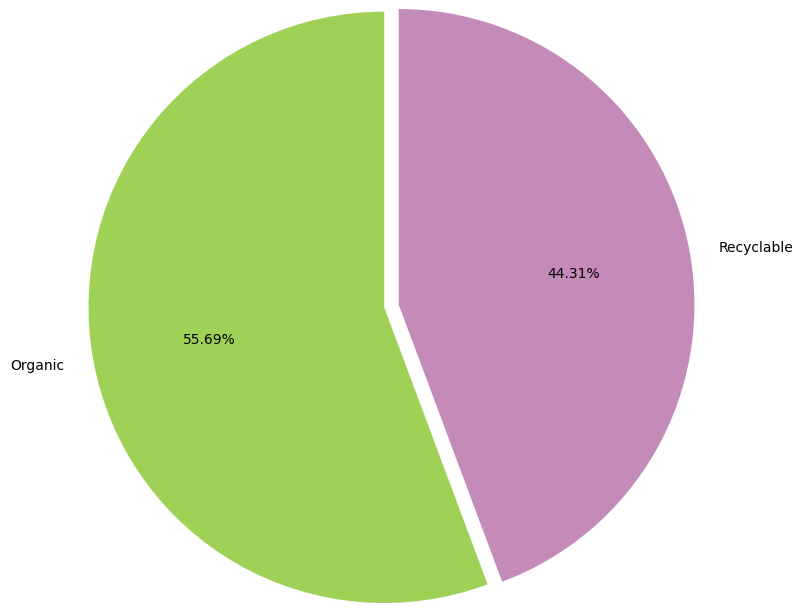

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

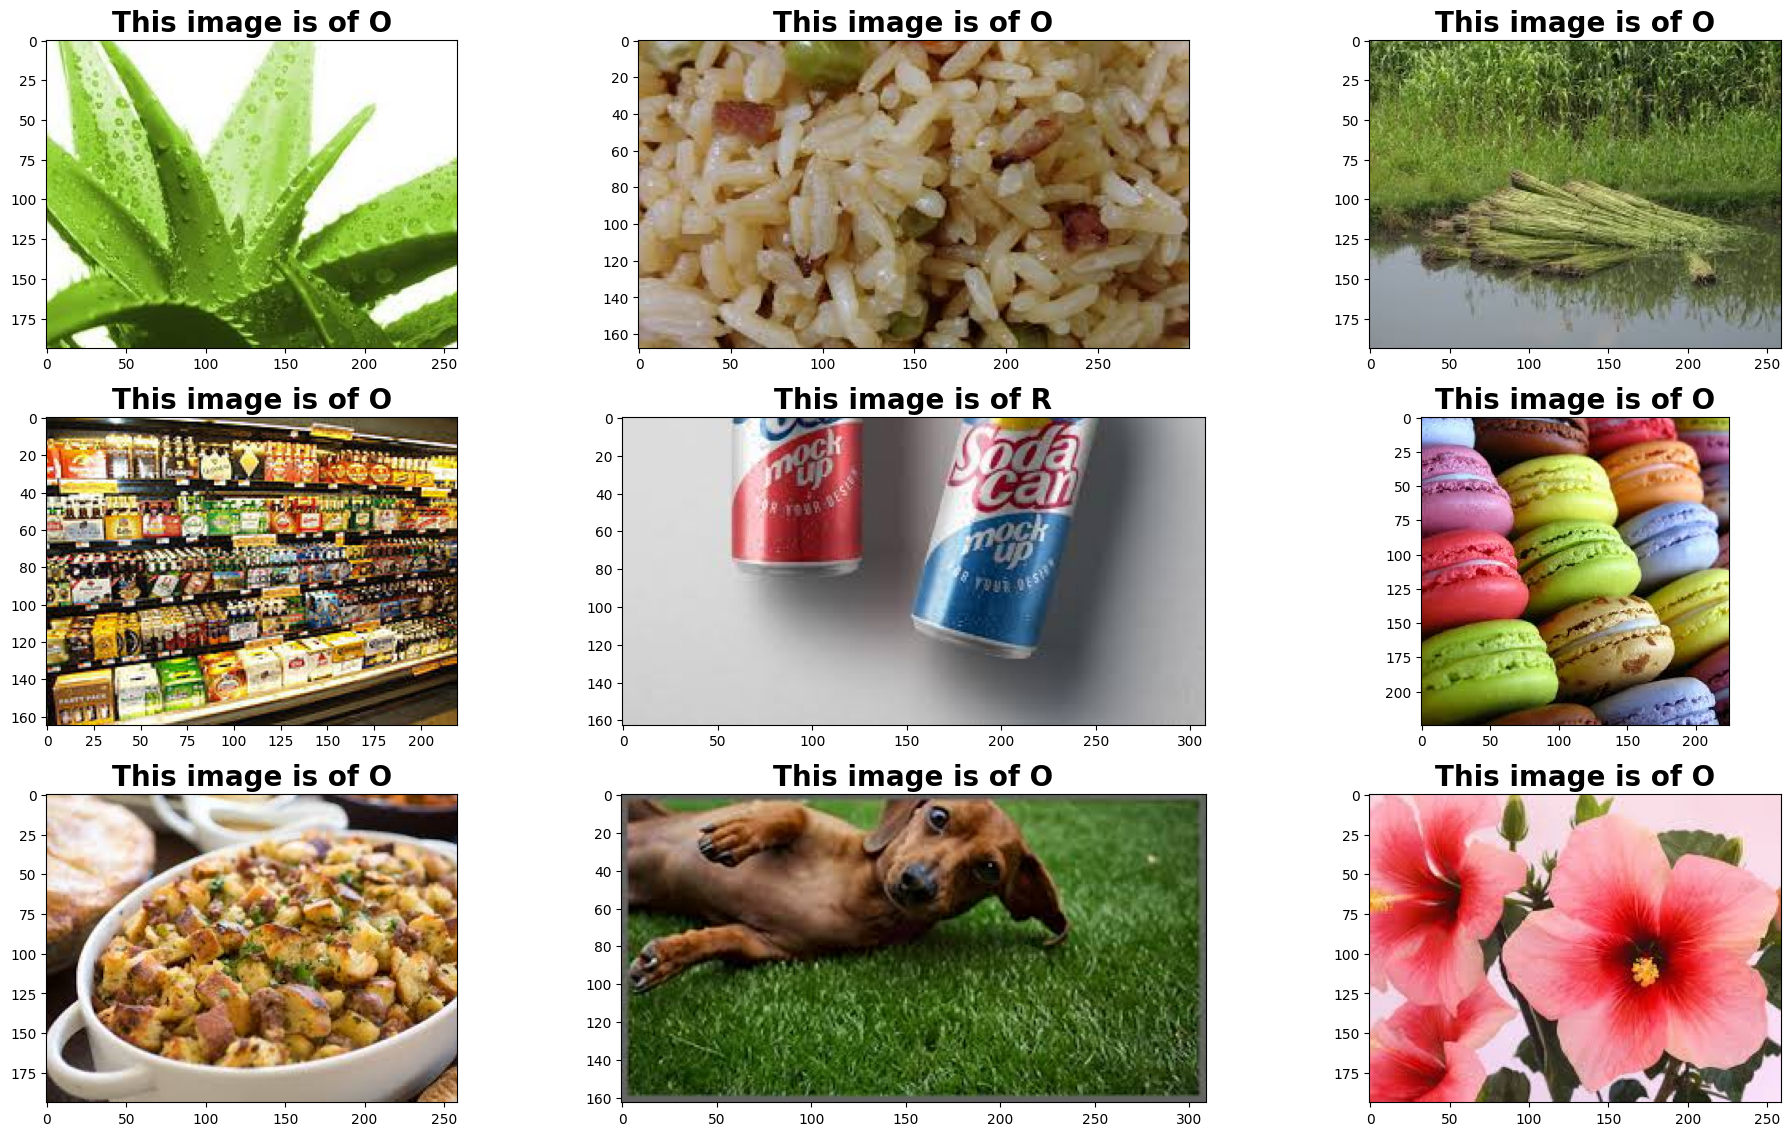

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

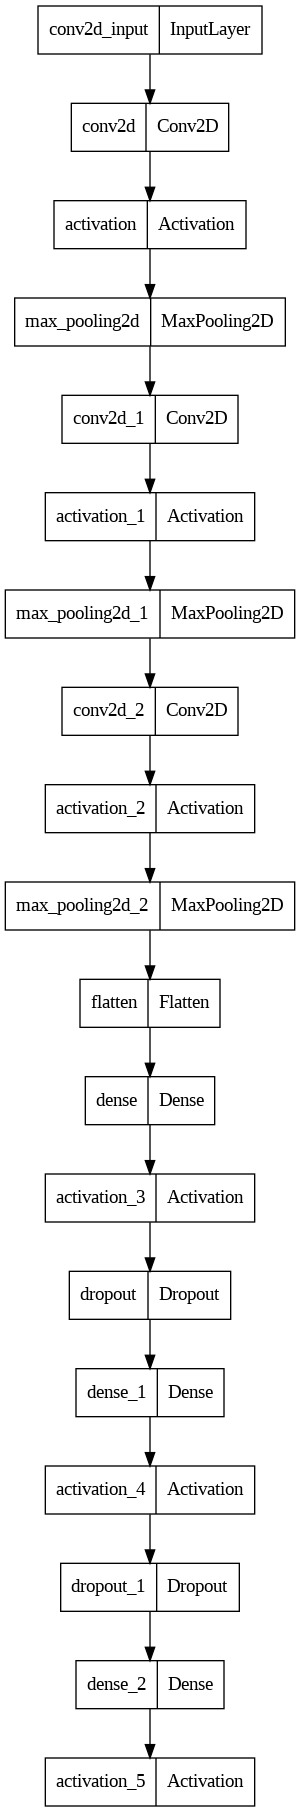

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 120s 1s/step - loss: 0.4912 - accuracy: 0.7923 - val_loss: 0.3423 - val_accuracy: 0.8735
Epoch 2/10
89/89 [==============================] - 96s 1s/step - loss: 0.3976 - accuracy: 0.8355 - val_loss: 0.2875 - val_accuracy: 0.8985
Epoch 3/10
89/89 [==============================] - 96s 1s/step - loss: 0.3672 - accuracy: 0.8508 - val_loss: 0.3913 - val_accuracy: 0.8257
Epoch 4/10
89/89 [==============================] - 96s 1s/step - loss: 0.3359 - accuracy: 0.8650 - val_loss: 0.2614 - val_accuracy: 0.9005
Epoch 5/10
89/89 [==============================] - 97s 1s/step - loss: 0.3103 - accuracy: 0.8758 - val_loss: 0.2755 - val_accuracy: 0.9001
Epoch 6/10
89/89 [==============================] - 96s 1s/step - loss: 0.2814 - accuracy: 0.8875 - val_loss: 0.2582 - val_accuracy: 0.9005
Epoch 7/10
89/89 [==============================] - 96s 1s/step - loss: 0.2469 - accuracy: 0.9031 - val_loss: 0.2789 - val_accuracy: 0.8965
Epoch 8/10
89/89 [=

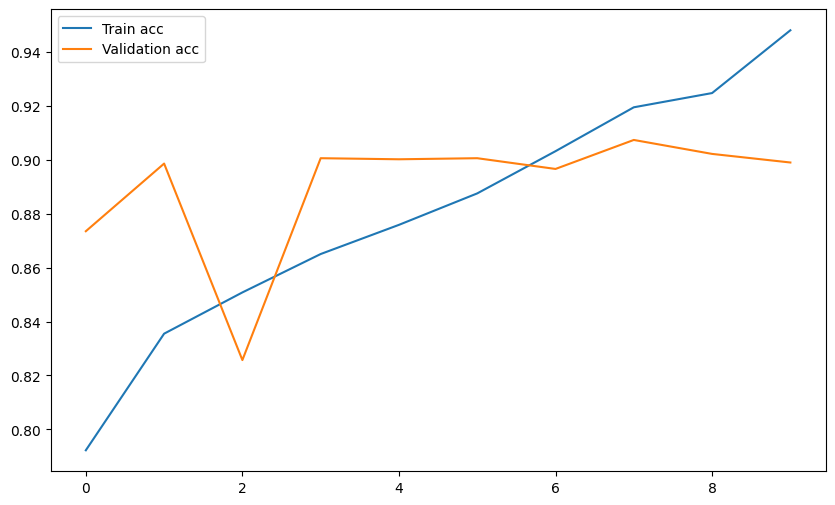

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

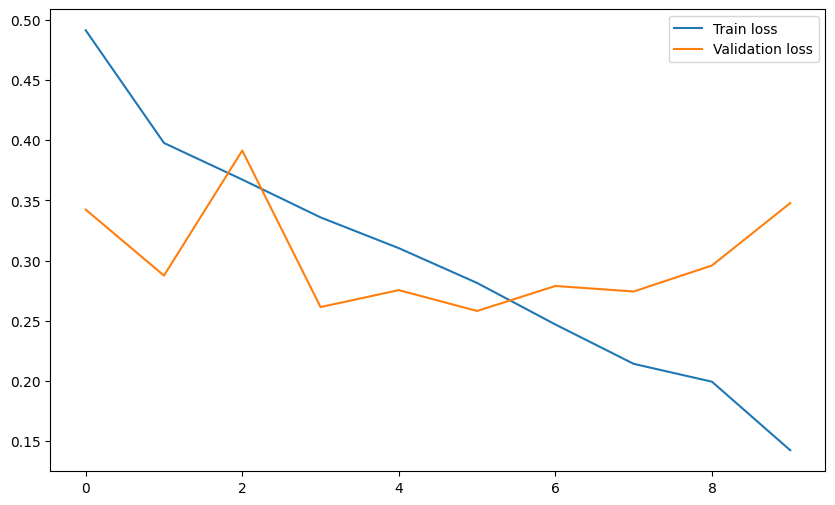

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 26ms/step
This image -> Organic


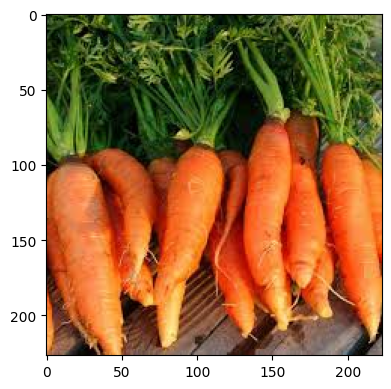

In [ ]:
test_img = cv2.imread("/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST/O/O_12568.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 25ms/step
This image -> Recyclable


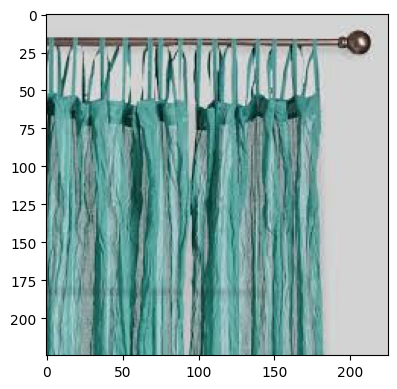

In [ ]:
test_img = cv2.imread("/content/drive/MyDrive/minaakbari_waste/data/dataset/DATASET/TEST/R/R_10005.jpg")
predict_func(test_img)